[Git](https://github.com/facebook/prophet)や[公式チュートリアル](https://facebook.github.io/prophet/docs/quick_start.html#python-api)を参考に、一回動かしてみる。  


あと、[こちら](https://www.slideshare.net/hoxo_m/prophet-facebook-76285278)も参考にした。  

In [1]:
# install
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.5.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_2         3.1 MB  conda-forge
    pystan-2.17.1.0            |   py36hf8a1672_2        30.1 MB  conda-forge
    fbprophet-0.3.post2        |           py36_0         4.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        37.8 MB

The following NEW packages will be INSTALLED:

    fbprophet:       0.3.post2-py36_0        conda-forge
    pystan:          2.17.1.0-py36hf8a1672_2 conda

In [2]:
import pandas as pd

df = pd.read_csv('./data/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
from fbprophet import Prophet

# 学習
m = Prophet()
m.fit(df)

INFO:matplotlib.font_manager:font search path ['/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
INFO:matplotlib.font_manager:generated new fontManager
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
# 予測

future = m.make_future_dataframe(periods=365) # 予測期間の指定
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.199274,7.482492,8.954913
3266,2017-01-16,8.524244,7.834078,9.257879
3267,2017-01-17,8.311615,7.629458,9.041970
3268,2017-01-18,8.144232,7.413674,8.918077
3269,2017-01-19,8.156091,7.412464,8.929039


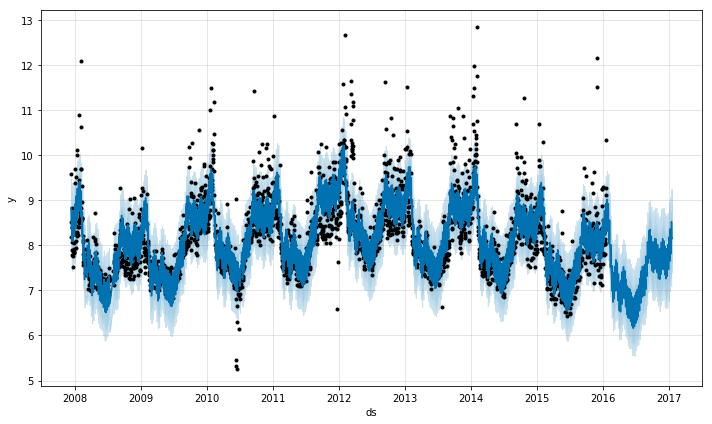

In [5]:
# 予測値と実測値の可視化

fig1 = m.plot(forecast)

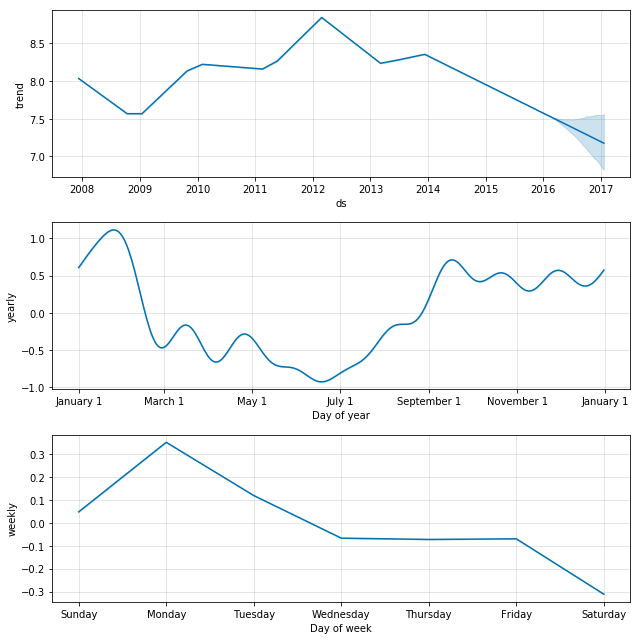

In [6]:
# 要素ごとに可視化
fig2 = m.plot_components(forecast)

## 非線形トレンドを入れる
デフォルトだとトレンドを線形にしているけど非線形にしてみる。

In [7]:
from fbprophet import Prophet

model = Prophet(growth='logistic') # トレンドを非線形にする
df['cap'] = 8.5 # 環境収容力を指定
model.fit(df) # 学習

# 同一条件で一年分の予測
future_df = model.make_future_dataframe(365*5)
future_df['cap'] = 8.5
forecast_df = model.predict(future_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


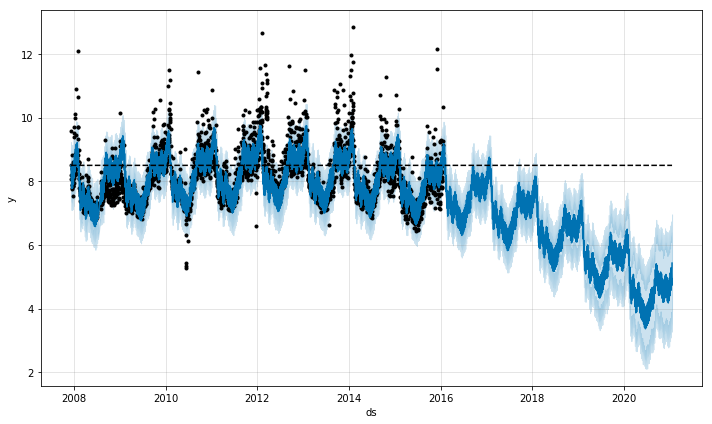

In [8]:
fig1 = model.plot(forecast_df)

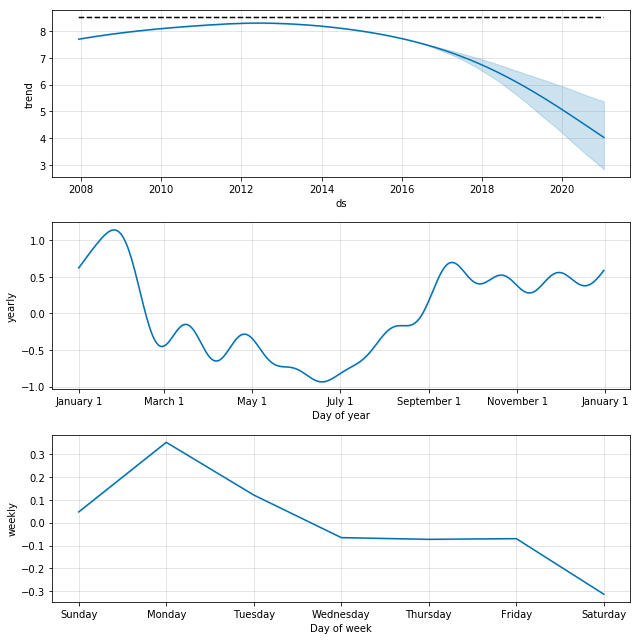

In [9]:
fig2 = model.plot_components(forecast_df)

# 変化点の指定

In [10]:
from fbprophet import Prophet

model = Prophet(changepoints=['2013-01-31']) # トレンドの変化点を指定
model.fit(df) # 学習

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


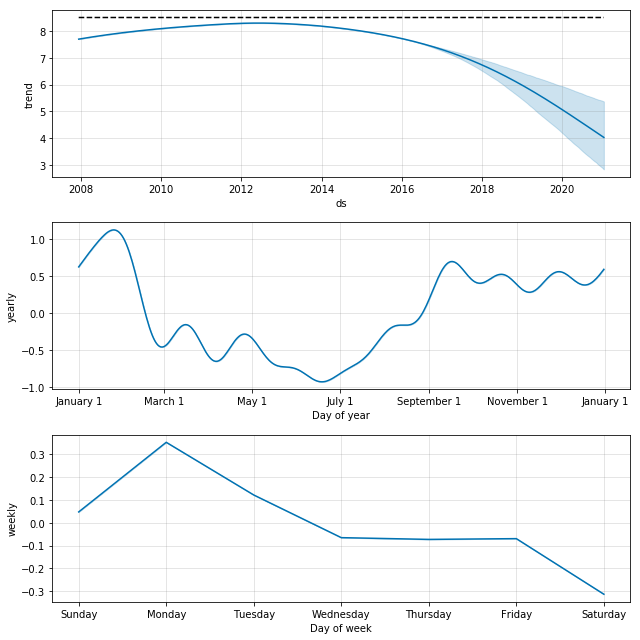

In [11]:
fig3 = model.plot_components(forecast_df)

## 変化点の自動検出
指定した点数だけ変化点が出力されるが、影響量が小さいようなら無視できる。

In [16]:
from fbprophet import Prophet

model = Prophet(growth='logistic', n_changepoints=25) # トレンドの変化点数を指定
model.fit(df) # 学習

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


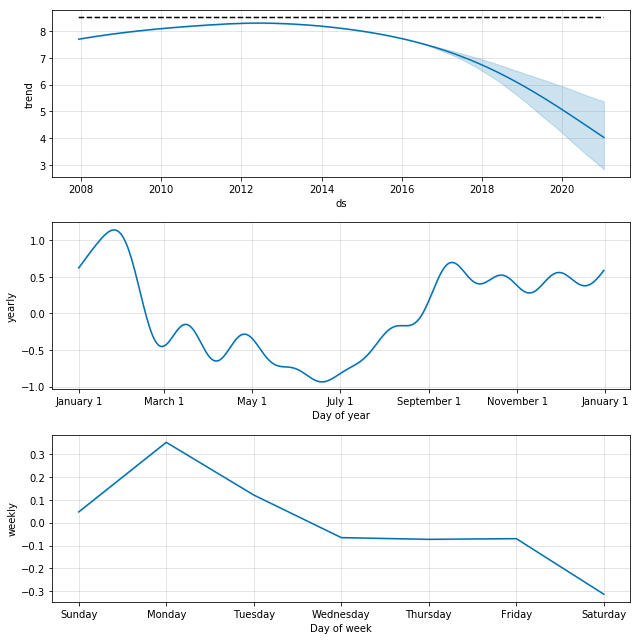

In [17]:
fig4 = model.plot_components(forecast_df)

# 週周期、年周期の考慮

In [18]:
from fbprophet import Prophet

model = Prophet(weekly_seasonality=False,
               yearly_seasonality=False,) # 周期を考慮するか否か、を指定
model.fit(df) # 学習

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


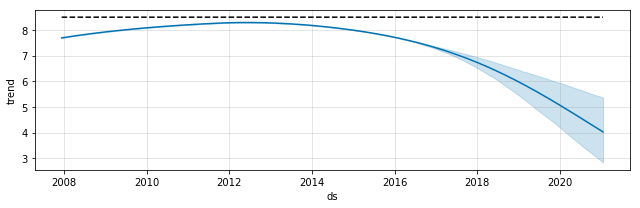

In [19]:
fig5 = model.plot_components(forecast_df)

# イベント効果を考慮する

In [ ]:
from fbprophet import Prophet

# イベントの日付等を指定。
event_dataframe = hogehoge

model = Prophet(holidays=event_dataframe) # 周期を考慮するか否か、を指定
model.fit(df) # 学習